In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics

df = pd.read_csv("rugvedlin.csv")

In [2]:
tng = df[:int((len(df) * 0.8))]
test = df[int((len(df) * 0.8)):]

In [3]:
for column in np.array(tng.columns):
    if tng[column].dtype == "float64" and column != "price":
        tng = tng[(tng[column] < (tng[column].mean() + 2*(tng[column].std()))) & (tng[column] > (tng[column].mean() - 2*(tng[column].std())))]

In [4]:
tng.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [5]:
'''for column in tng.select_dtypes(include = "object").columns :
    sns.pairplot(tng, hue=column)

sns.pairplot(tng, hue="price")'''

'for column in tng.select_dtypes(include = "object").columns :\n    sns.pairplot(tng, hue=column)\n\nsns.pairplot(tng, hue="price")'

In [6]:
'''n = 1

for i in tng.pivot_table(values=["price"], index=["clarity"]).sort_values(by=["price"]).index:
    tng["clarity"].replace({i:n}, inplace=True)
    n = n + 1'''

'n = 1\n\nfor i in tng.pivot_table(values=["price"], index=["clarity"]).sort_values(by=["price"]).index:\n    tng["clarity"].replace({i:n}, inplace=True)\n    n = n + 1'

In [7]:
'''m = 1

for color in tng.pivot_table(values=["price"], index=["color"]).sort_values(by=["price"]).index:
    tng["color"].replace({color:m}, inplace=True)
    m = m + 1'''

'm = 1\n\nfor color in tng.pivot_table(values=["price"], index=["color"]).sort_values(by=["price"]).index:\n    tng["color"].replace({color:m}, inplace=True)\n    m = m + 1'

In [8]:
l = 1

for cut in tng.pivot_table(values=["price"], index=["cut"]).sort_values(by=["price"]).index:
    tng["cut"].replace({cut:l}, inplace=True)
    l = l + 1


In [9]:
corr_matrix = tng.select_dtypes(exclude="object").corr()
corr_matrix

,carat,cut,depth,table,x,y,z,price
carat,1.000000,0.151564,0.009362,0.066462,0.643518,0.640288,0.453866,0.862204
cut,0.151564,1.000000,0.007512,0.187542,0.123003,0.092515,0.069107,0.072024
depth,0.009362,0.007512,1.000000,-0.017079,-0.015903,0.002498,0.021827,-0.003189
table,0.066462,0.187542,-0.017079,1.000000,0.062592,0.051591,0.028113,0.046916
x,0.643518,0.123003,-0.015903,0.062592,1.000000,0.456666,0.317210,0.583340
y,0.640288,0.092515,0.002498,0.051591,0.456666,1.000000,0.318846,0.580841
z,0.453866,0.069107,0.021827,0.028113,0.317210,0.318846,1.000000,0.404502
price,0.862204,0.072024,-0.003189,0.046916,0.583340,0.580841,0.404502,1.000000


<Axes: >

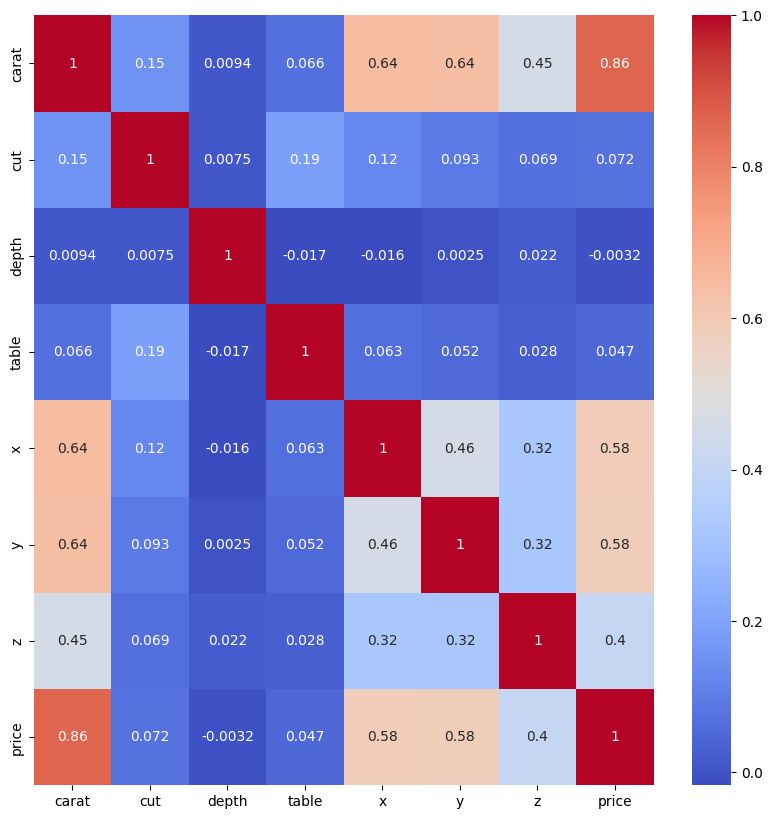

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)

In [11]:
tng = pd.get_dummies(df, columns=['color','cut','clarity'], dtype="int")
tng

,carat,depth,table,x,y,z,price,color_D,color_E,color_F,...,cut_Premium,cut_Very Good,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.544971,63.911017,52.575829,5.447452,4.053076,3.701485,3.558,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,2.073682,67.642925,57.660288,6.266665,7.661507,6.177051,24.738,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0.606198,55.617310,60.388787,6.800151,5.096966,3.480326,3.630,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0.695397,60.587811,71.325721,5.366931,6.616767,4.454435,4.218,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,0.282651,68.970056,54.372123,4.920104,4.409408,4.361358,1.578,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.251768,69.674513,52.790228,5.657402,5.832983,3.386799,1.628,0,1,0,...,1,0,0,0,0,0,1,0,0,0
11996,1.729415,56.191121,48.024573,6.725585,8.624433,4.822269,15.508,0,0,0,...,1,0,0,0,1,0,0,0,0,0
11997,2.252697,64.007494,63.641838,8.510526,9.108384,3.674364,20.018,0,0,0,...,0,1,0,0,0,1,0,0,0,0
11998,0.139030,64.885328,55.383459,2.799799,2.281538,2.419920,0.746,1,0,0,...,0,1,0,0,0,0,0,1,0,0


In [12]:
def scaling(data):
    data = (data - data.mean(axis=0))/data.std(axis=0)
    return data

In [13]:
X = np.array(tng.iloc[:,:-1])
Y = np.array(tng["price"])

X1 = np.array(scaling(tng.iloc[:,:-1]))
Y1 = np.array(scaling(tng["price"])).reshape((len(X), 1))

w = np.zeros((int(len(tng.columns) - 1), 1))
b = 0

In [14]:
def multi_lin_reg(X, Y, w, b):
    costfunction = []
    for i in range(1000):
        y_predicted = np.dot(X, w) + b
        error = y_predicted - Y
        
        costfn = np.sum((error**2))
        costfn = costfn/(len(X))

        w_gradient = np.dot(X.T, error)/(len(X))
        w = w - 0.1*w_gradient
        b_gradient = (np.sum(error))/(2*len(X)) 
        b = b - 0.1*b_gradient
        costfunction.append((costfn))

        if i%50 == 0:
            print(f"costfunction at {i} = {costfn}")


    plt.plot(range(1000), costfunction)
    plt.xlabel("Iterations")
    plt.ylabel("Costfunction")
    plt.show()

    return w , b

costfunction at 0 = 0.9999166666666668
costfunction at 50 = 0.01566273056778673
costfunction at 100 = 0.007009281477634686
costfunction at 150 = 0.0038918490922648583
costfunction at 200 = 0.002210509196030759
costfunction at 250 = 0.0012626221207036625
costfunction at 300 = 0.0007230798492527577
costfunction at 350 = 0.0004146578841866971
costfunction at 400 = 0.00023796105051109657


costfunction at 450 = 0.00013661139300623722
costfunction at 500 = 7.844317878623157e-05
costfunction at 550 = 4.504737734786837e-05
costfunction at 600 = 2.5870698730570763e-05
costfunction at 650 = 1.4857975726969665e-05
costfunction at 700 = 8.533317561515161e-06
costfunction at 750 = 4.900944098115172e-06
costfunction at 800 = 2.8147736588140254e-06
costfunction at 850 = 1.6166209564043675e-06
costfunction at 900 = 9.284819313087955e-07
costfunction at 950 = 5.332599733054857e-07


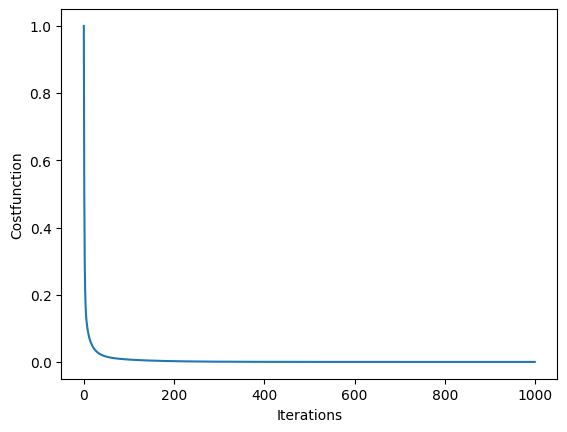

In [15]:
w, b = multi_lin_reg(X1, Y1, w, b)

In [16]:
X2 = np.array(test.iloc[:,:-1])
Y2 = np.array(test["price"])

In [17]:
sklearn.metrics.r2_score(Y1, (np.dot(X1, w) + b))

0.9999996937043311

In [18]:
def rescaling(x,y,w,b):

    b = -((w*(x.mean())).sum()) + y.mean() + b

    for i in range(len(w)):
        w[i] = w[i]*(y.std()/x.std(axis=0)[i])

    return w, b
